In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

observations = pd.read_csv("observations.csv")



In [26]:
species = pd.read_csv("species_info.csv")

#fill the missing conservation status with "No danger"
species["conservation_status"]= species["conservation_status"].fillna("No danger")


In [15]:
#combine the tables, so all of the species info is in one space
obs_and_spec = pd.merge(observations, species)
#makes a list of everything needing attention = concern, endangered, threatened, recovery
in_danger = obs_and_spec[obs_and_spec["conservation_status"] != "No danger"]
park_groups = obs_and_spec.groupby("park_name").observations.sum()


In [16]:

#The amount of observations of species for each conservation status
in_danger_sum = in_danger.groupby("conservation_status")["observations"].sum()
#The number of types of species for each conservation status
in_danger_count = in_danger.groupby("conservation_status")["observations"].count()



Pie chart of each species type more concerning than no danger - observations


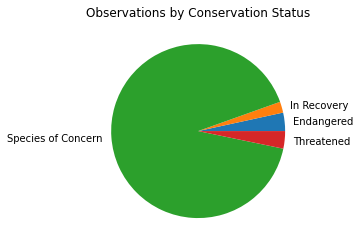

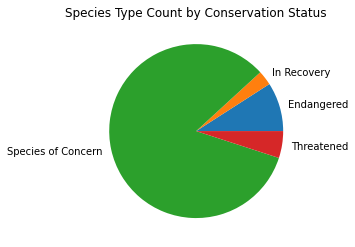

This is self explanitory, the species in the mildest level of concern have the most observations because 
they are more prolific than other types. However, in the type count, there is a higher ratio for endangered species 
than the observation count. This means that there are multiple types of endangered species but very few 
observations of them. The goal is to make the second chart look like the first (reduce the amount of species listed 
as endangered


<Figure size 432x288 with 0 Axes>

In [24]:
print("Pie chart of each species type more concerning than no danger - observations")


graph_labels = ["Endangered", "In Recovery", "Species of Concern", "Threatened"]
#Total observations per category
plt.pie(in_danger_sum, labels = graph_labels)
plt.title("Observations by Conservation Status")
plt.show()
plt.clf()
#How many types of species per category
plt.pie(in_danger_count, labels = graph_labels)
plt.title("Species Type Count by Conservation Status")
plt.show()
plt.clf()

print("""This is self explanitory, the species in the mildest level of concern have the most observations because 
they are more prolific than other types. However, in the type count, there is a higher ratio for endangered species 
than the observation count. This means that there are multiple types of endangered species but very few 
observations of them. The goal is to make the second chart look like the first (reduce the amount of species listed 
as endangered""")

In [29]:
print("These are the park names\n")
#data frame for each park
bryce_frame  = in_danger[in_danger["park_name"] == "Bryce National Park"]
smoky_frame = in_danger[in_danger["park_name"] == "Great Smoky Mountains National Park"]
yellowstone_frame = in_danger[in_danger["park_name"] == "Yellowstone National Park"]
yosemite_frame = in_danger[in_danger["park_name"] == "Yosemite National Park"]

#Grouping each national park by observations per conservation status
bryce_by_level = bryce_frame.groupby("conservation_status")["observations"].sum().reset_index()
smoky_by_level = smoky_frame.groupby("conservation_status")["observations"].sum().reset_index()
yellowstone_by_level = yellowstone_frame.groupby("conservation_status")["observations"].sum().reset_index()
yosemite_by_level = yosemite_frame.groupby("conservation_status")["observations"].sum().reset_index()

print(park_groups)



These are the park names

park_name
Bryce National Park                     633291
Great Smoky Mountains National Park     474863
Yellowstone National Park              1587641
Yosemite National Park                  949452
Name: observations, dtype: int64


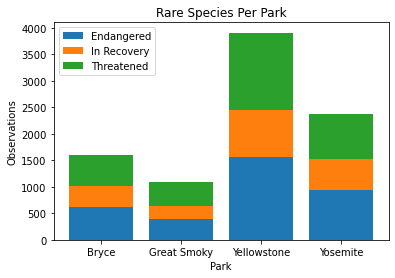

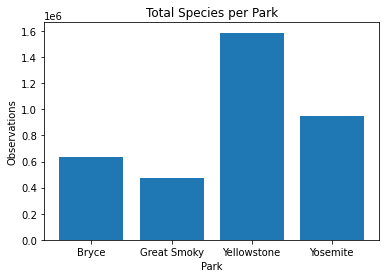

This shows that the parks with more total species observations also have more rare species observations. 
None of the parks have extraordinary high or low amounts of rare species observations compared to total species
observations. All parks should be payed attention to equally in terms of reviving species


In [19]:
#x axis - The park names for serious animals
#y axis - the total amount concerning observations, each stacked bar represents the status
endanger = [619, 393, 1558, 943]
in_recovery  = [388, 248, 889, 582]
threatened  = [591, 440, 1459, 849]
total = [633291, 474863, 1587641, 949452]
threat_bottom = np.add(endanger, in_recovery)
plt.bar(range(4),endanger)

plt.bar(range(4),
  in_recovery,
  bottom=endanger)

plt.bar(range(4),
  threatened,
  bottom=threat_bottom)

plt.legend(['Endangered', 'In Recovery', 'Threatened'])
ax = plt.subplot()
ax.set_xticks(range(4))
ax.set_xticklabels(["Bryce", "Great Smoky", "Yellowstone", "Yosemite"] )
plt.xlabel("Park")
plt.ylabel("Observations")
plt.title("Rare Species Per Park")
plt.show()
plt.clf()

plt.bar(range(4), total)
ax = plt.subplot()
ax.set_xticks(range(4))
ax.set_xticklabels(["Bryce", "Great Smoky", "Yellowstone", "Yosemite"] )
plt.xlabel("Park")
plt.ylabel("Observations")
plt.title("Total Species per Park")

plt.show()

print("""This shows that the parks with more total species observations also have more rare species observations. 
None of the parks have extraordinary high or low amounts of rare species observations compared to total species
observations. All parks should be payed attention to equally in terms of reviving species""")

Pie chart of each species type above no danger - observations


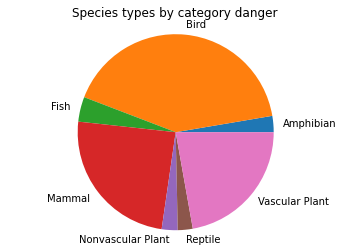

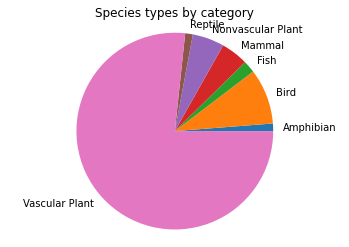

Compared to the total amount of vascular plants, relatively less have been identified as concerning.
Birds and mammals should be payed attention to because there are relatively small amounts of observations in total, 
but the observations of birds and mammals comprise of nearly three quarters of rare species


<Figure size 432x288 with 0 Axes>

In [20]:
print("Pie chart of each species type above no danger - observations")

#total observations by category in danger
category_sum_danger = in_danger.groupby("category")["observations"].sum().reset_index()
graph_labels = ["Amphibian", "Bird", "Fish", "Mammal", "Nonvascular Plant", "Reptile", "Vascular Plant"]

plt.pie(category_sum_danger["observations"], labels = graph_labels)
plt.axis("equal")
plt.title("Species types by category danger")
plt.show()
plt.clf()


#total observations by category total
category_sum = obs_and_spec.groupby("category")["observations"].sum().reset_index()

graph_labels = ["Amphibian", "Bird", "Fish", "Mammal", "Nonvascular Plant", "Reptile", "Vascular Plant"]

plt.pie(category_sum["observations"], labels = graph_labels)
plt.axis("equal")
plt.title("Species types by category")
plt.show()
plt.clf()
print("""Compared to the total amount of vascular plants, relatively less have been identified as concerning.
Birds and mammals should be payed attention to because there are relatively small amounts of observations in total, 
but the observations of birds and mammals comprise of nearly three quarters of rare species""")


In [30]:
print("Species with the least observations, need most attention\n")

in_danger = in_danger.sort_values(by=['observations'])
print(in_danger["scientific_name"].head())



Species with the least observations, need most attention

2479       Rana sierrae
23160    Grus americana
4602        Canis rufus
6033        Canis lupus
6032        Canis lupus
Name: scientific_name, dtype: object
